# Demo of STARCOP models on AVIRIS data

Demos with model loading and inference on AVIRIS data from the test set. Make sure to use GPU backend on Google Colab with these.

*Update Jan 2025: the library versions were updated to work with the current Colab environment.*

In [1]:
!pip install --quiet rasterio
!pip install --quiet --upgrade gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 19.0 MB/s eta 0:00:00


In [2]:
# Clone the repository:
!git clone https://github.com/spaceml-org/STARCOP.git

Cloning into 'STARCOP'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 160 (delta 52), reused 119 (delta 25), pack-reused 0 (from 0)
Receiving objects: 100% (160/160), 8.56 MiB | 18.18 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [3]:
%cd /content/

# Data:
# STARCOP_mini.zip with 261 MB
!gdown https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl -O STARCOP_mini.zip

# Models:
!gdown https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX -O multistarcop_varon.zip
!gdown https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql -O hyperstarcop_magic_rgb.zip

/content
Downloading...
From (original): https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl
From (redirected): https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl&confirm=t&uuid=b112488a-224b-4dd2-970f-6b0c9b3bb654
To: /content/STARCOP_mini.zip
100% 274M/274M [00:05<00:00, 47.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX
From (redirected): https://drive.google.com/uc?id=1TXFlAHO_eRdfbJGLNNt3KY0lJqjm3fdX&confirm=t&uuid=7a811c57-3c84-445a-aa5c-0ba925622d20
To: /content/multistarcop_varon.zip
100% 73.5M/73.5M [00:00<00:00, 88.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql
From (redirected): https://drive.google.com/uc?id=1Kvnc_lOBn4z-xO1HFRyLZOMEldXWQvql&confirm=t&uuid=87ef8205-1e7f-40a0-811d-d30cbb4dff2a
To: /content/hyperstarcop_magic_rgb.zip
100% 73.3M/73.3M [00:02<00:00, 33.1MB/s]


In [4]:
!unzip -q STARCOP_mini.zip
!unzip -q multistarcop_varon.zip
!unzip -q hyperstarcop_magic_rgb.zip
# clean-up
!rm *.zip

In [5]:
!ls

hyperstarcop_magic_rgb	multistarcop_varon  sample_data  STARCOP  STARCOP_mini


In [6]:
%cd /content/STARCOP

/content/STARCOP


In [7]:
# Install libraries
# normally this would use be easiest with this:
# !pip --quiet install -r requirements.txt

# however there were some updates on Colab, so the exact versions needed to be adjusted:
# (btw: "!python --version" currently gives Python 3.11.11 (as of January 2025)

# In general, we need to use a valid combination, see:
# torch and torchtext https://github.com/pytorch/pytorch/wiki/PyTorch-Versions
# pytorch lightning: https://lightning.ai/docs/pytorch/latest/versioning.html#compatibility-matrix

# This combination seems to work:

!pip install git+https://github.com/spaceml-org/georeader.git
!pip install torch==2.0.0 torchvision==0.15.1 torchtext==0.15.1 pytorch-lightning==2.2
# ^ feasibly other combinations would also work ...

# then all the other dependencies (these are all from requirements.txt minus torch and pytorch-lightning)
!pip install fsspec gcsfs omegaconf kornia==0.6.7  torchmetrics==0.10.0 wandb segmentation_models_pytorch hydra-core ipython rasterio  geopandas ipykernel matplotlib scikit-image scikit-learn wandb==0.13.3


  Cloning https://github.com/spaceml-org/georeader.git to /tmp/pip-req-build-u8ebcx35
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/georeader.git /tmp/pip-req-build-u8ebcx35
  Resolved https://github.com/spaceml-org/georeader.git to commit 164cb852924039bf925f2a9623898804996052df
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for georeader-spaceml: filename=georeader_spaceml-1.3.13-py3-none-any.whl size=165112 sha256=a7b35d44448d07c2e19d1b3e393c4182b9542a42b1ea403b211c7f6488a6ddad
  Stored in directory: /tmp/pip-ephem-wheel-cache-fc1yxvle/wheels/cd/34/57/784cd337e7393b168823abf3147bf7921b7aca950b1bdb80da
Successfully built georeader-spaceml
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2

In [ ]:
assert False
# please restart the runtime with the button above ^

In [1]:
%cd /content/STARCOP

/content/STARCOP


In [2]:
import omegaconf
import pylab as plt
import torch
import omegaconf
import fsspec
import os
import json
import pandas as pd
import numpy as np
from starcop.torch_utils import to_device
import starcop.plot as starcoplot
from mpl_toolkits.axes_grid1 import make_axes_locatable

from starcop.data.datamodule import Permian2019DataModule
from starcop.models.model_module import ModelModule
from starcop.validation import run_validation

device = torch.device("cuda:0")
fs = fsspec.filesystem("gs")
config_general = omegaconf.OmegaConf.load("scripts/configs/config.yaml")
root_folder = "/content/STARCOP_mini"

/usr/local/lib/python3.11/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

## HyperSTARCOP

In [4]:
hsi_model_path = "/content/hyperstarcop_magic_rgb/final_checkpoint_model.ckpt"
hsi_config_path = "/content/hyperstarcop_magic_rgb/config.yaml"

In [5]:
def load_model_with_datamodule(model_path, config_path):
    config_model = omegaconf.OmegaConf.load(config_path)
    config = omegaconf.OmegaConf.merge(config_general, config_model)

    import ast
    dataset_dict = ast.literal_eval(config_model['_content']['value']['dataset'])
    dataset_dict['root_folder'] = root_folder
    dataset_dict['train_csv'] = '/content/STARCOP_mini/train_mini10.csv'
    config.dataset = dataset_dict
    config.products_plot = config_model['_content']['value']['products_plot']

    data_module = Permian2019DataModule(config)
    data_module.test_csv = '/content/STARCOP_mini/test_mini10.csv'
    data_module.settings['dataset'] = dataset_dict
    data_module.prepare_data()

    model = ModelModule.load_from_checkpoint(model_path, settings=config)
    model.to(device)
    model.eval() # !

    print("Loaded model with",model.num_channels,"input channels, data module with", len(data_module.input_products), "inputs:", data_module.input_products, ", for plotting we use these products:", config.products_plot)

    return model, data_module, config

hsi_model, hsi_dm, hsi_config = load_model_with_datamodule(hsi_model_path, hsi_config_path)
print("successfully loaded HyperSTARCOP model!")

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Computing label statistics: 100%|██████████| 441/441 [00:02<00:00, 218.54it/s]
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.7.7 to v2.2.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../hyperstarcop_magic_rgb/final_checkpoint_model.ckpt`


Loaded model with 4 input channels, data module with 4 inputs: ['mag1c', 'TOA_AVIRIS_640nm', 'TOA_AVIRIS_550nm', 'TOA_AVIRIS_460nm'] , for plotting we use these products: ['rgb_aviris', 'mag1c', 'label', 'pred', 'differences']
successfully loaded HyperSTARCOP model!


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


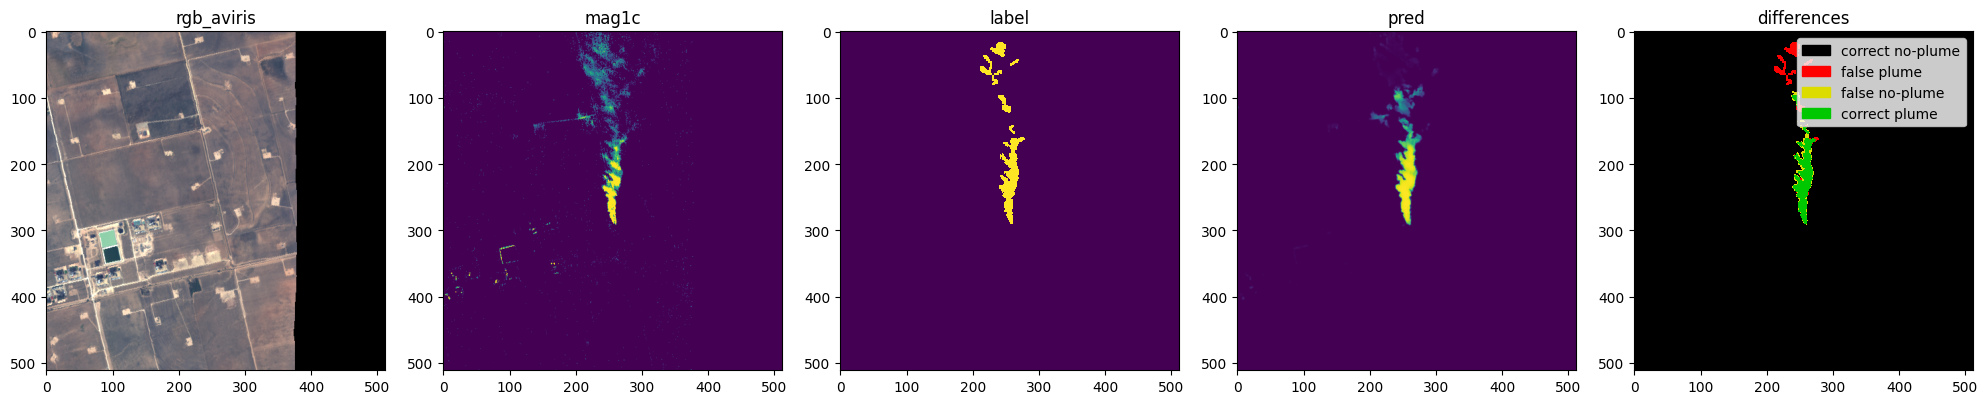

In [6]:
dataloader = hsi_dm.test_dataloader(batch_size=1)
how_many = 1
for i, plume_data in enumerate(dataloader):
    plume_data = hsi_model.batch_with_preds(to_device(plume_data, hsi_model.device))
    fig = starcoplot.plot_batch(to_device(plume_data,"cpu"), input_products=hsi_config.dataset.input_products,
                                products_plot=hsi_config.products_plot, figsize_ax=(4, 4))

    plt.show(fig)
    plt.close()

    how_many -=1
    if how_many <= 0: break

In [ ]:
# from starcop.validation import run_validation
# dataloader = hsi_dm.test_dataloader(batch_size=1)
# hsi_metrics_per_id, hsi_metrics = run_validation(hsi_model, dataloader, products_plot=hsi_config.products_plot, verbose=True,
#                                           show_plots=True, skip_saving_plots=True, # < for showing
#                                           #show_plots=False, skip_saving_plots=False, # < for saving
#                                           path_save_results="hyperstarcop_outputs")

# # Note: The metrics on this small subset, don't make much sense

## MultiSTARCOP

In [7]:
msi_model_path = "/content/multistarcop_varon/final_checkpoint_model.ckpt"
msi_config_path = "/content/multistarcop_varon/config.yaml"

msi_model, msi_dm, msi_config = load_model_with_datamodule(msi_model_path, msi_config_path)
print("Successfully loaded MultiSTARCOP model!")

Feature ratio_wv3_B7_B5_varon21_sum_c_out does not exists. It will be generated
Feature ratio_wv3_B8_B5_varon21_sum_c_out does not exists. It will be generated
Feature ratio_wv3_B7_B6_varon21_sum_c_out does not exists. It will be generated


100%|██████████| 9/9 [00:02<00:00,  3.97it/s]


Feature ratio_wv3_B7_B5_varon21_sum_c_out does not exists. It will be generated
Feature ratio_wv3_B8_B5_varon21_sum_c_out does not exists. It will be generated
Feature ratio_wv3_B7_B6_varon21_sum_c_out does not exists. It will be generated


100%|██████████| 9/9 [00:01<00:00,  4.59it/s]
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.7.7 to v2.2.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../multistarcop_varon/final_checkpoint_model.ckpt`
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 59.5MB/s]


Loaded model with 3 input channels, data module with 3 inputs: ['ratio_wv3_B7_B5_varon21_sum_c_out', 'ratio_wv3_B8_B5_varon21_sum_c_out', 'ratio_wv3_B7_B6_varon21_sum_c_out'] , for plotting we use these products: ['wv3_ratios_varon_b7b5', 'wv3_ratios_varon_b8b5', 'wv3_ratios_varon_b7b6', 'label', 'pred', 'differences']
Successfully loaded MultiSTARCOP model!


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


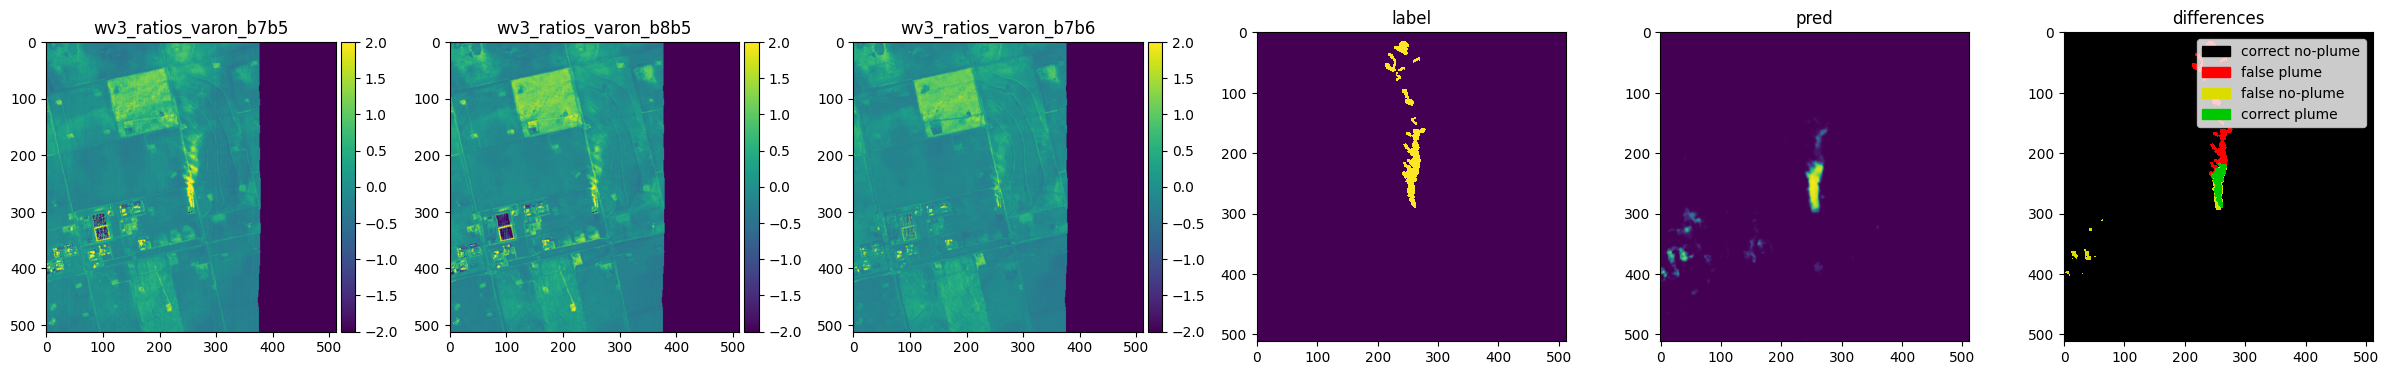

In [8]:
dataloader = msi_dm.test_dataloader(batch_size=1)
how_many = 1
for i, plume_data in enumerate(dataloader):
    plume_data = msi_model.batch_with_preds(to_device(plume_data, msi_model.device))
    fig = starcoplot.plot_batch(to_device(plume_data,"cpu"), input_products=msi_config.dataset.input_products,
                                products_plot=msi_config.products_plot, figsize_ax=(4, 4))

    plt.show(fig)
    plt.close()

    how_many -=1
    if how_many <= 0: break


In [ ]:
# from starcop.validation import run_validation
# dataloader = msi_dm.test_dataloader(batch_size=1)
# msi_metrics_per_id, msi_metrics = run_validation(msi_model, dataloader, products_plot=msi_config.products_plot, verbose=True,
#                                           show_plots=True, skip_saving_plots=True, # < for showing
#                                           #show_plots=False, skip_saving_plots=False, # < for saving
#                                           path_save_results="multistarcop_outputs")

# # Note: The metrics on this small subset, don't make much sense